# 📊 06 – Monitoring Light

This notebook is used for lightweight data monitoring and sanity checks during the annotation phase of the project.

## 🎯 Purpose

- 📈 Visualize the **distribution of facial emotions** for each annotated batch.
- 📝 Log the **emotion counts** to `label_monitor_log.csv` for drift detection across batches.
- ✅ *(Optional)* Track model accuracy over time using `log_accuracy()` and save to `model_monitor_log.json`.

## 🛠 Utilities

Before running any monitoring steps, make sure to import functions from the utility file:

```python
from monitoring_utils import plot_label_distribution, log_label_distribution, log_accuracy


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import sys

# 👇 Add đường dẫn Colab Notebooks vào sys.path để Python nhận ra
sys.path.append("/content/drive/MyDrive/Colab Notebooks")

# ✅ Import các hàm monitoring
from monitoring_utils import plot_label_distribution, log_label_distribution


In [12]:

from google.colab import auth
auth.authenticate_user()

from google.cloud import storage
import os

# === CONFIG ===
project_id = 'exalted-summer-454012-d2'
bucket_name = 'boothill2001-dataset'
prefix = 'annotations/'
local_dir = '/content/annotations'

# === INIT ===
client = storage.Client(project=project_id)
bucket = client.bucket(bucket_name)
os.makedirs(local_dir, exist_ok=True)

# === DOWNLOAD CSVs ===
blobs = bucket.list_blobs(prefix=prefix)

for blob in blobs:
    if blob.name.endswith(".csv"):
        filename = os.path.basename(blob.name)
        local_path = os.path.join(local_dir, filename)
        blob.download_to_filename(local_path)
        print(f"✅ Downloaded: {filename}")


✅ Downloaded: emotion_labels_batch_1.csv
✅ Downloaded: emotion_labels_batch_10.csv
✅ Downloaded: emotion_labels_batch_11.csv
✅ Downloaded: emotion_labels_batch_12.csv
✅ Downloaded: emotion_labels_batch_13.csv
✅ Downloaded: emotion_labels_batch_14.csv
✅ Downloaded: emotion_labels_batch_15.csv
✅ Downloaded: emotion_labels_batch_16.csv
✅ Downloaded: emotion_labels_batch_17.csv
✅ Downloaded: emotion_labels_batch_18.csv
✅ Downloaded: emotion_labels_batch_19.csv
✅ Downloaded: emotion_labels_batch_2.csv
✅ Downloaded: emotion_labels_batch_20.csv
✅ Downloaded: emotion_labels_batch_21.csv
✅ Downloaded: emotion_labels_batch_22.csv
✅ Downloaded: emotion_labels_batch_23.csv
✅ Downloaded: emotion_labels_batch_24.csv
✅ Downloaded: emotion_labels_batch_25.csv
✅ Downloaded: emotion_labels_batch_26.csv
✅ Downloaded: emotion_labels_batch_27.csv
✅ Downloaded: emotion_labels_batch_28.csv
✅ Downloaded: emotion_labels_batch_29.csv
✅ Downloaded: emotion_labels_batch_3.csv
✅ Downloaded: emotion_labels_batch_30

In [18]:

log_output_path = "/content/annotations/label_monitor_log.csv"

# Xóa log cũ nếu cần
if os.path.exists(log_output_path):
    os.remove(log_output_path)

for batch_id in range(1, 33):
    csv_path = f"/content/annotations/emotion_labels_batch_{batch_id}.csv"
    if not os.path.exists(csv_path):
        print(f"❌ Không tìm thấy batch {batch_id}")
        continue

    try:
        df = pd.read_csv(csv_path)
        log_label_distribution(df, label_col="dominant_emotion", log_path=log_output_path, batch_id=batch_id)
        print(f"✅ Logged batch {batch_id}: {len(df)} samples")
    except Exception as e:
        print(f"⚠️ Lỗi batch {batch_id}: {e}")


✅ Logged batch 1: 1000 samples
✅ Logged batch 2: 1000 samples
✅ Logged batch 3: 1000 samples
✅ Logged batch 4: 1000 samples
✅ Logged batch 5: 1000 samples
✅ Logged batch 6: 1000 samples
✅ Logged batch 7: 1000 samples
✅ Logged batch 8: 1000 samples
✅ Logged batch 9: 1000 samples
✅ Logged batch 10: 1000 samples
✅ Logged batch 11: 1000 samples
✅ Logged batch 12: 1000 samples
✅ Logged batch 13: 1000 samples
✅ Logged batch 14: 1000 samples
✅ Logged batch 15: 1000 samples
✅ Logged batch 16: 1000 samples
✅ Logged batch 17: 1000 samples
✅ Logged batch 18: 1000 samples
✅ Logged batch 19: 1000 samples
✅ Logged batch 20: 1000 samples
✅ Logged batch 21: 1000 samples
✅ Logged batch 22: 1000 samples
✅ Logged batch 23: 1000 samples
✅ Logged batch 24: 1000 samples
✅ Logged batch 25: 1000 samples
✅ Logged batch 26: 1000 samples
✅ Logged batch 27: 1000 samples
✅ Logged batch 28: 1000 samples
✅ Logged batch 29: 1000 samples
✅ Logged batch 30: 1000 samples
✅ Logged batch 31: 1000 samples
✅ Logged batch 32

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


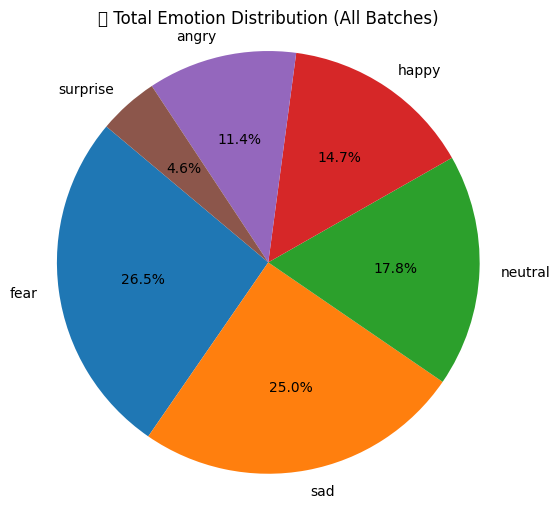

In [17]:
import pandas as pd
# Tổng hợp biểu đồ pie từ toàn bộ log
log_df = pd.read_csv(log_output_path,on_bad_lines='skip')
emotion_columns = [col for col in log_df.columns if col not in ['batch_id', 'timestamp']]
total_counts = log_df[emotion_columns].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("📊 Total Emotion Distribution (All Batches)")
plt.axis('equal')
plt.show()


In [19]:

import pandas as pd
from glob import glob

csv_files = sorted(glob("/content/annotations/emotion_labels_batch_*.csv"))

all_df = []
for path in csv_files:
    try:
        df = pd.read_csv(path)
        all_df.append(df)
    except Exception as e:
        print(f"⚠️ Lỗi đọc {path}: {e}")

final_df = pd.concat(all_df, ignore_index=True)
print(f"✅ Tổng số ảnh đã annotate: {len(final_df)}")
final_df.head()


✅ Tổng số ảnh đã annotate: 31783


,filename,age,gender,dominant_emotion,dominant_race
0,1000092795.jpg,31,"{'Woman': np.float32(8.204366), 'Man': np.floa...",neutral,asian
1,10002456.jpg,30,"{'Woman': np.float32(2.7630906), 'Man': np.flo...",neutral,white
2,1000268201.jpg,29,"{'Woman': np.float32(4.2036314), 'Man': np.flo...",sad,white
3,1000344755.jpg,33,"{'Woman': np.float32(8.685013), 'Man': np.floa...",fear,white
4,1000366164.jpg,41,"{'Woman': np.float32(0.96645916), 'Man': np.fl...",fear,white


In [20]:
from glob import glob

csv_files = sorted(glob("/content/annotations/emotion_labels_batch_*.csv"))
print(f"🔍 Tìm thấy {len(csv_files)} file CSV")

for path in csv_files[:5]:
    print("📄", path)


🔍 Tìm thấy 32 file CSV
📄 /content/annotations/emotion_labels_batch_1.csv
📄 /content/annotations/emotion_labels_batch_10.csv
📄 /content/annotations/emotion_labels_batch_11.csv
📄 /content/annotations/emotion_labels_batch_12.csv
📄 /content/annotations/emotion_labels_batch_13.csv


In [21]:

# Lưu thành Parquet để load nhanh
final_df.to_parquet("/content/final_emotion_dataset.parquet", index=False)
print("✅ Saved as final_emotion_dataset.parquet")


✅ Saved as final_emotion_dataset.parquet


In [22]:

from google.colab import auth
auth.authenticate_user()

from google.cloud import storage

project_id = 'exalted-summer-454012-d2'
bucket_name = 'boothill2001-dataset'
destination_path = 'dataset/final_emotion_dataset.parquet'

client = storage.Client(project=project_id)
bucket = client.bucket(bucket_name)

blob = bucket.blob(destination_path)
blob.upload_from_filename("/content/final_emotion_dataset.parquet")
print(f"☁️ Đã upload final dataset lên GCS tại: gs://{bucket_name}/{destination_path}")


☁️ Đã upload final dataset lên GCS tại: gs://boothill2001-dataset/dataset/final_emotion_dataset.parquet
